# MP02: CS 498 DSG (Spring 2019)


# Task 0 – Getting Started

In [0]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# import the datasets
df1 = pd.read_csv('BayesInferenceBase.csv')
df2 = pd.read_csv('BayesInferenceMetf.csv')
df3 = pd.read_csv('GeneExpression_Baseline.csv')
df4 = pd.read_csv('GeneExpression_Metformin.csv')
df5 = pd.read_csv('QualityControl.csv')

## Question 1

**In the context of statistical analysis, why do biologists need multiple cells to identify genes with significantly altered expression?**

**Answer:** Biologists want to observe the effect of metformin on the genes, that's why they need multiple cells under different conditions to determine the causal relationship of metformin on different cells. To be able to perform statistical tests to determine the relationship between genes(features) and output(altered epression), we need multiple cells.

## Question 2

**How many cells were sequenced?**

In [0]:
# First 5 columns "GeneID, Chr, Start, Stop, CoddingLength" should not be included.
cells_count = df3.shape[1]- 5
print("Total No of Cells that were sequenced: "+str(cells_count))

Total No of Cells that were sequenced: 192


## Question 3

**How many genes were sequenced?**

In [0]:
genes_count = df3['GeneID'].nunique()
print("No of unique genes that were sequenced: "+str(genes_count))

No of unique genes that were sequenced: 23346


## Question 4

**Are genes equally distributed across chromosomes?**

Text(0.5, 1.0, 'Distribution of Genes across Chromosomes')

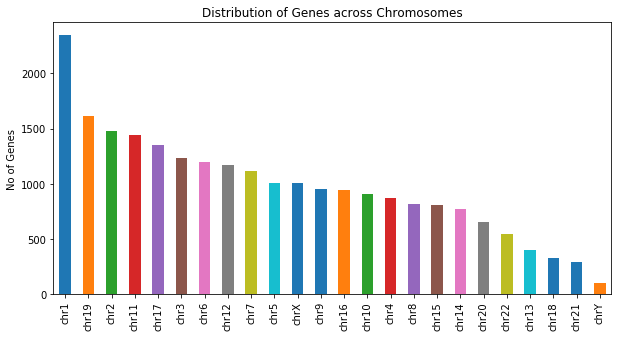

In [0]:
df3['Chr'].value_counts().plot.bar(figsize=(10,5))
plt.ylabel('No of Genes')
plt.title('Distribution of Genes across Chromosomes')

**Conclusion:** Based on above plot, genes are not equally distributed across the chromosomes

## Question 5

**Plot the distribution of coding length**

(0, 20000)

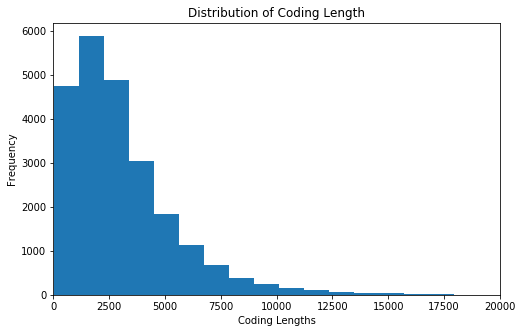

In [0]:
df3['CodingLength'].plot(kind='hist', bins =100,figsize=(8,5))
plt.xlabel('Coding Lengths')
plt.ylabel('Frequency')
plt.title('Distribution of Coding Length')
plt.xlim(0,20000)

The above distribution seems to be exponential

# Task 1 – Data Cleaning and Visual Inspection

## Question 1: Bayesian Network for Quality Control

**(a)** Give the factorization of the joint probability distribution.

$\text{P(Temperature,Time,Viability,Quality)} = \text{P(Quality | Time, Viability) P(Viability|Temperature, Time) P(Temperature) P(Time)}$

**(b)** Count the number of parameters needed to define the conditional probability distribution of the Bayesian Network for quality control.

The number of Parameters to define the conditional probability distribution $\text{P(Quality|time, temperature)} =  \sum_{viability}\text{P(Quality| viability, Time) P(viability| Temperature, Time)}$ are:  $4 +8 = 12$



In [0]:
df3.head()

,GeneID,Chr,Start,Stop,CodingLength,BaselineCell_1,BaselineCell_2,BaselineCell_3,BaselineCell_4,BaselineCell_5,...,BaselineCell_183,BaselineCell_184,BaselineCell_185,BaselineCell_186,BaselineCell_187,BaselineCell_188,BaselineCell_189,BaselineCell_190,BaselineCell_191,BaselineCell_192
0,DDX11L1,chr1,11874,14408,1651,61,47,72,77,75,...,39,34,28,25,30,29,92,26,43,33
1,WASH7P,chr1,14362,29370,1769,72,60,79,80,81,...,26,26,19,26,19,22,96,33,32,44
2,FAM138A,chr1,34611,36081,1130,159,182,152,133,147,...,59,64,44,51,47,54,145,57,65,59
3,FAM138F,chr1,34611,36081,1130,64,54,88,92,63,...,24,31,23,19,25,33,86,45,25,20
4,OR4F5,chr1,69091,70008,918,61,57,63,61,69,...,40,41,17,25,27,27,99,31,32,29


**(c)** Show the conditional probability tables

$\text{P(Time)}$ as follows:

In [0]:
time = {}
total = df5.shape[0]
time['long']= ((df5['time'] == 'long').sum())/total
time['short'] = ((df5['time'] == 'short').sum())/total

print('P(Time = long)=', time['long'], 'P(Time = Short)=', time['short'])


P(Time = long)= 0.0964 P(Time = Short)= 0.9036


$\text{P(Temperature)}$ as follows

In [0]:
temper = {}
for i in df5['temp'].unique():
    temper['temp ='+i] = (df5['temp'] == i).sum()/total
print(temper)

{'temp =cool': 0.4948, 'temp =hot': 0.0958, 'temp =warm': 0.3044, 'temp =cold': 0.105}


$\text{P(Viability|Temperature, Time)}$ as follows :

In [0]:
viab_group= df5[['viab','temp', 'time']]
new_df = pd.DataFrame(data = np.ones([8,4]), columns = [ 'temp' , 'time', 'viab = high', 'viab = low'])
new_df = new_df.astype('str')

In [0]:
idx = 0
for i in viab_group['temp'].unique():
    for j in viab_group['time'].unique():
        for k in viab_group['viab'].unique():
            val = ((viab_group['viab'] == k) &(viab_group['temp'] == i) & (viab_group['time'] == j)).sum()
            new_df.at[idx,'time'] = j
            new_df.at[idx,'temp'] = i
            if k == 'high':
                new_df.at[idx,'viab = high'] = val/((viab_group['temp'] == i) & (viab_group['time'] == j)).sum()
            else:
                new_df.at[idx,'viab = low'] = val/((viab_group['temp'] == i) & (viab_group['time'] == j)).sum()
        idx += 1
(new_df)

,temp,time,viab = high,viab = low
0,cool,short,0.948268,0.0517319
1,cool,long,0.792829,0.207171
2,hot,short,0.212815,0.787185
3,hot,long,0.0714286,0.928571
4,warm,short,0.906657,0.093343
5,warm,long,0.707143,0.292857
6,cold,short,0.415966,0.584034
7,cold,long,0.265306,0.734694


**Note:** It can be observed that viability is higher in lower temp and shorter time.

$\text{P(Quality | Time, Viability)}$ as follows:

In [0]:
viab_group2= df5[['qual','viab', 'time']]
new_df2 = pd.DataFrame(data = np.ones([4,4]), columns = [ 'viab' , 'time', 'qual = good', 'qual = bad'])
new_df2 = new_df2.astype('str')

In [0]:
idx = 0
for i in viab_group2['viab'].unique():
    for j in viab_group2['time'].unique():
        for k in viab_group2['qual'].unique():
            val = ((viab_group2['qual'] == k) &(viab_group2['viab'] == i) & (viab_group2['time'] == j)).sum()
            new_df2.at[idx,'time'] = j
            new_df2.at[idx,'viab'] = i
            if k == 'good':
                new_df2.at[idx,'qual = good'] = val/((viab_group2['viab'] == i) & (viab_group2['time'] == j)).sum()
            else:
                new_df2.at[idx,'qual = bad'] = val/((viab_group2['viab'] == i) & (viab_group2['time'] == j)).sum()
        idx += 1
new_df2

,viab,time,qual = good,qual = bad
0,high,short,0.894852,0.105148
1,high,long,0.522293,0.477707
2,low,short,0.517321,0.482679
3,low,long,0.047619,0.952381


**Note:** It can be observed that quality is higher in higher viability and shorter time.

In [0]:
**(d)** Calculate P(Quality|Temperature, Time) 

In [0]:
$\text{P(Quality|Temperature, Time)} = \sum_{viab} \text{P(Quality| viability, Time) P(viability| Temperature, Time)}$

In [0]:
qual_df = pd.DataFrame(data = np.ones([8,4]), columns = [ 'temp' , 'time', 'qual = good', 'qual = bad'])
qual_df = qual_df.astype('str')
index = 0

for i in df5['temp'].unique():
    for j in df5['time'].unique():
        data= (new_df2[new_df2['time']== j]['qual = good'].values).astype(float)
        data2 = (new_df[(new_df['temp'] == i) & (new_df['time']== j)][['viab = high', 'viab = low']].values).astype(float)
        qual_df.at[index, 'temp'] = i
        qual_df.at[index, 'time'] = j
        qual_df.at[index, 'qual = good'] = float(data2@data)
        qual_df.at[index, 'qual = bad'] = 1 - float(data2@data)
        index += 1
qual_df

,temp,time,qual = good,qual = bad
0,cool,short,0.875322,0.124678
1,cool,long,0.423954,0.576046
2,hot,short,0.597665,0.402335
3,hot,long,0.0815243,0.918476
4,warm,short,0.859612,0.140388
5,warm,long,0.383281,0.616719
6,cold,short,0.674361,0.325639
7,cold,long,0.173553,0.826447


<b>(e) </b> Use the calculated conditional probabilities and the collected data
BayesInferenceBase.csv, BayesInferenceMetf.csv to determine the quality of the
sequenced cells given Temperature and Time during the experiments. Report bad
quality cells. Drop bad quality cells for the following analyses.

In [0]:
print(qual_df[qual_df['qual = bad'] >= 0.5], '\n')
print('The bad cells are the ones which have  time: long and are dropped for further analysis')

   temp  time qual = good qual = bad
1  cool  long    0.423954   0.576046
3   hot  long   0.0815243   0.918476
5  warm  long    0.383281   0.616719
7  cold  long    0.173553   0.826447 

The bad cells are the ones which have  time: long and are dropped for further analysis


In [0]:
## dropping bad quality cells
new_df3 = df3.copy()
new_df4 = df4.copy()
new_df3 = new_df3.drop(df1[df1['time'] =='long']['CellName'].values, axis=1)
new_df4 = new_df4.drop(new_df4.columns[-8:], axis=1)

In [0]:
## Question 2: Data Standardization

**(a)** Calculate the sum of expression level (summing up all genes) of each cell. Plot the histogram of the sums

In [0]:
sums_base = new_df3.iloc[:,5:].sum()
sums_met = new_df4.iloc[:,5:].sum()

Text(0.5, 0, 'Sums of Expression Levels')

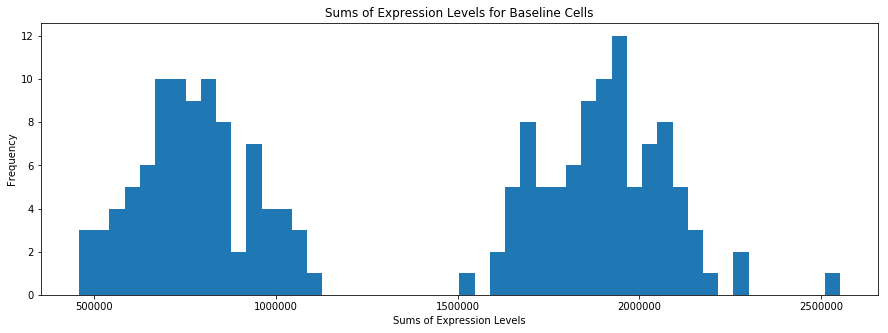

In [0]:
sums_base.plot.hist(bins=50,figsize=(15,5))
plt.title('Sums of Expression Levels for Baseline Cells')
plt.xlabel('Sums of Expression Levels')

Text(0.5, 0, 'Sums of Expression Levels')

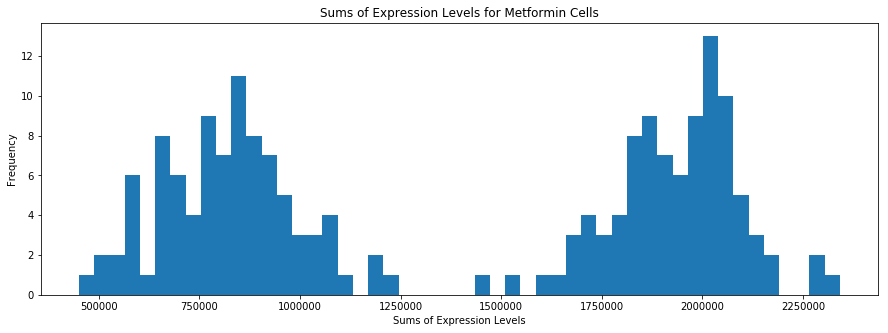

In [0]:
sums_met.plot.hist(bins=50,figsize=(15,5))
plt.title('Sums of Expression Levels for Metformin Cells')
plt.xlabel('Sums of Expression Levels')

**Observation: It seems like there are two brackets in which the sum of Expression levels are divided and the ones with sum expressions between around 500000 and 1250000 got spread after Metformin and the ones with sum of expressions between 1500000 and 2500000 got shifted a little towards right** 

**(b)** Assume the sum of the expression level of all genes should be the same across cells. Normalize the gene expression matrices to get rid of the bias induced by the amount of reagent consumed so that the normalized sum of expression level of a cell equals to 1. Plot the histograms specified in Task 1.2.a. with the normalized data.

In [0]:
norm_df3 = new_df3.copy()
norm_df3.set_index('GeneID',inplace=True)
norm_df3.iloc[:,4:] = norm_df3.iloc[:,4:]/sums_base

norm_df4 = new_df4.copy()
norm_df4.set_index('GeneID',inplace=True)
norm_df4.iloc[:,4:] = norm_df4.iloc[:,4:]/sums_met

In [0]:
norm_sums_base = round(norm_df3.iloc[:,4:].sum(),5)
norm_sums_met = round(norm_df3.iloc[:,4:].sum(),5)

Text(0.5, 0, 'Sums of Normalized Expression Levels')

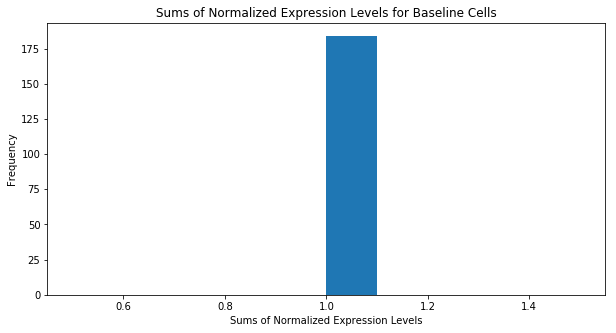

In [0]:
norm_sums_base.plot.hist(bins=10,figsize=(10,5))
plt.title('Sums of Normalized Expression Levels for Baseline Cells')
plt.xlabel('Sums of Normalized Expression Levels')

Text(0.5, 0, 'Sums of Normalized Expression Levels')

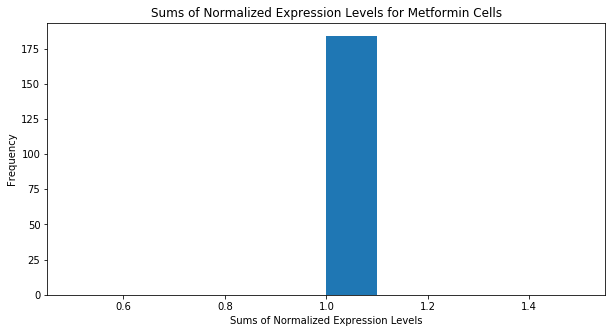

In [0]:
norm_sums_met.plot.hist(bins=10,figsize=(10,5))
plt.title('Sums of Normalized Expression Levels for Metformin Cells')
plt.xlabel('Sums of Normalized Expression Levels')

## Question 3: Visual Inspection

**(a)** Heatmap is a visual representation where individual values contained in a matrix are represented as colors. Plot heatmaps of the gene expression matrices. You’re expected to plot two heatmaps - one for baseline cells, and one for metformin-treated cells. The heatmaps should have genes as rows and cells as columns. Briefly summarize your observations. 

Text(159.0, 0.5, 'Genes')

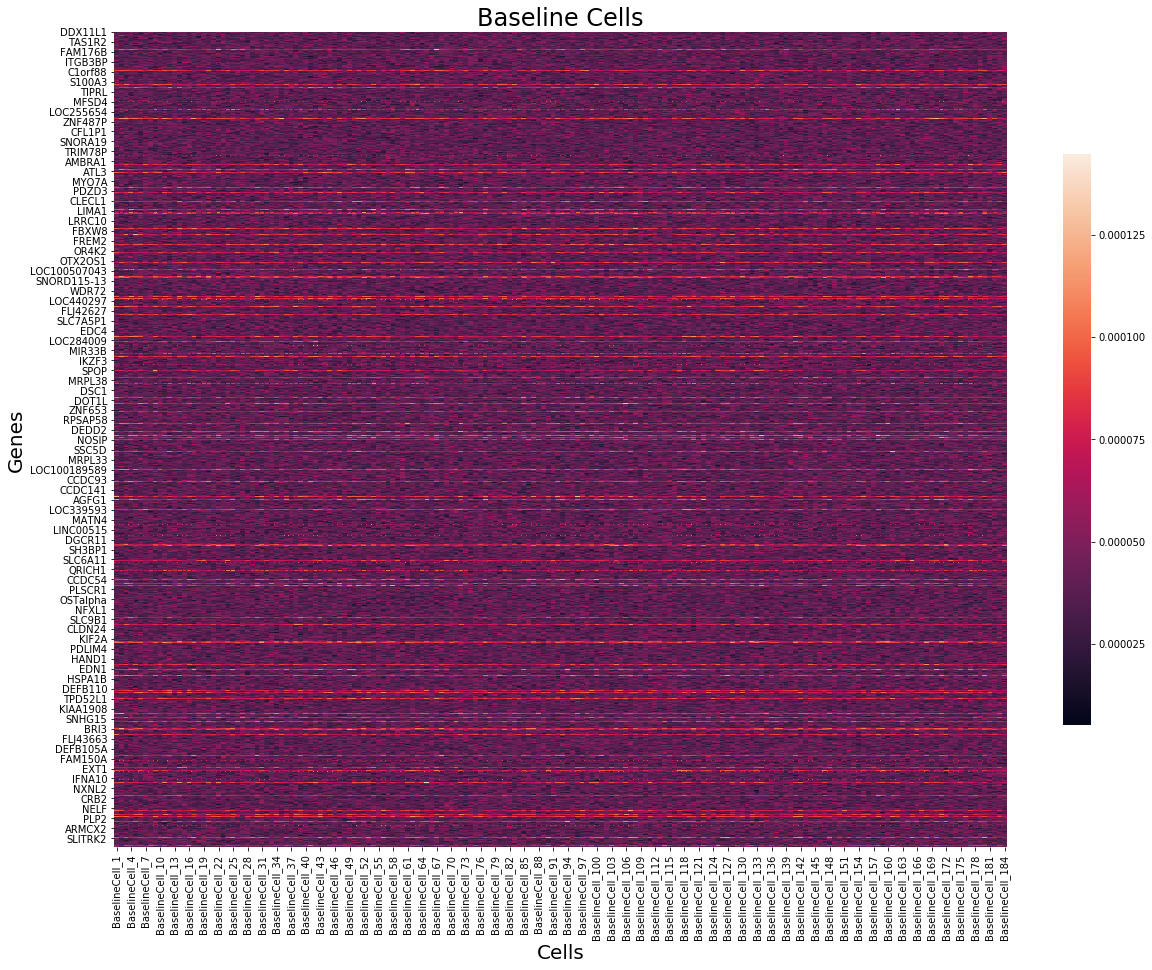

In [0]:
plt.figure(figsize=(20, 15))
sns.heatmap(norm_df3.iloc[:,4:],cbar=True,cbar_kws={"shrink": .7})
plt.title('Baseline Cells',fontsize=24)
plt.xlabel('Cells',fontsize=20)
plt.ylabel('Genes',fontsize=20)

Text(159.0, 0.5, 'Genes')

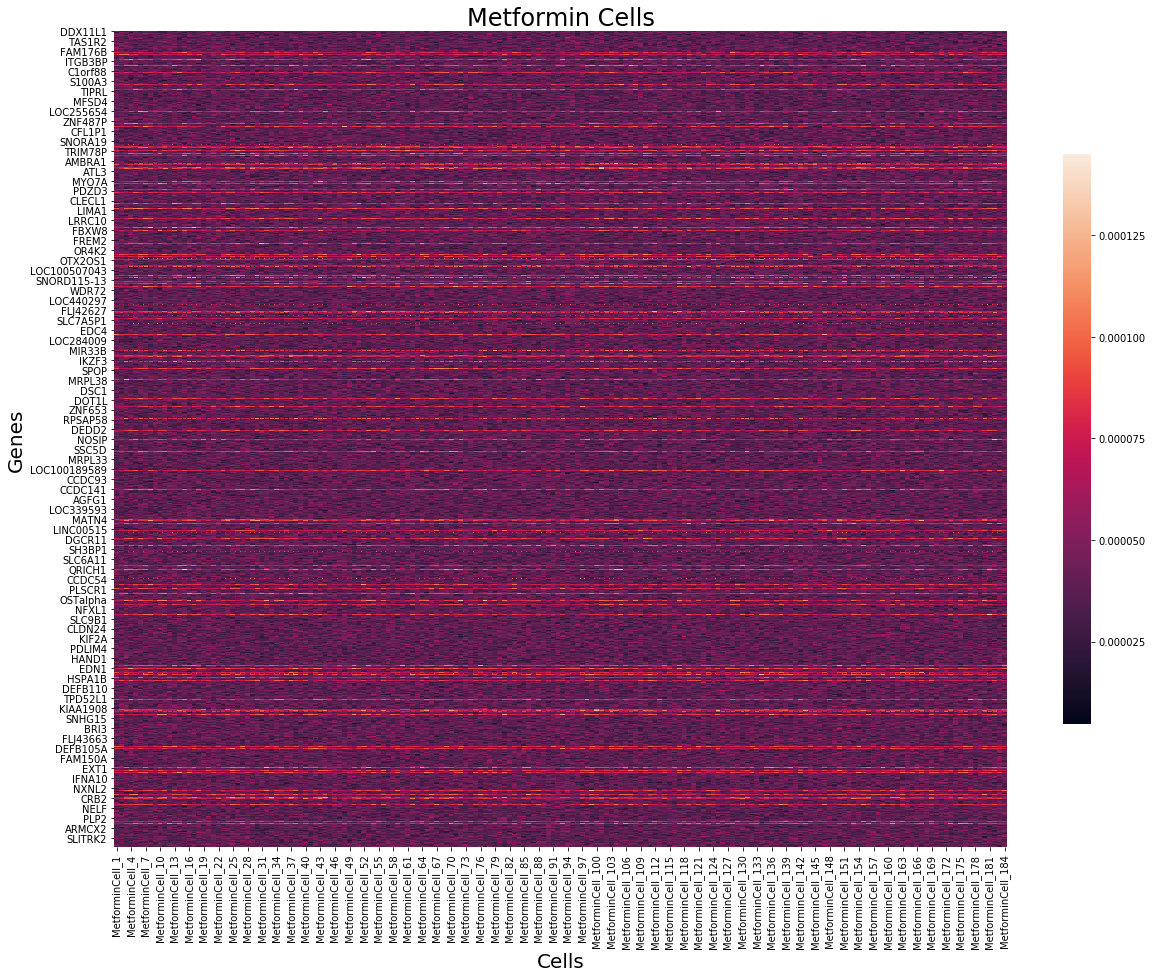

In [0]:
plt.figure(figsize=(20, 15))
sns.heatmap(norm_df4.iloc[:,4:],cbar=True,cbar_kws={"shrink": .7})
plt.title('Metformin Cells',fontsize=24)
plt.xlabel('Cells',fontsize=20)
plt.ylabel('Genes',fontsize=20)

**(b)** Plot the distribution of gene expression across all cells for KCND2, TMEM239, and LINC00336, separately. Baseline cells and metformin-treated cells should be considered separately. (In total you’re expected to plot 6 distributions which can be plotted in the same graph if you choose.) Briefly summarize your observations.

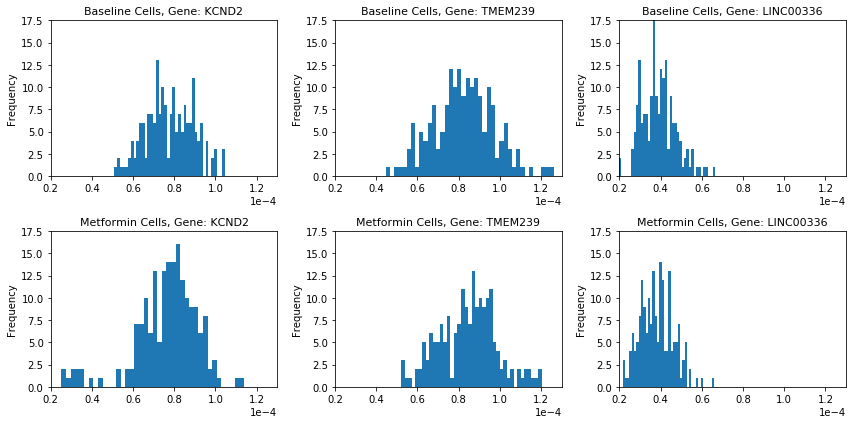

In [0]:
genes_list = ['KCND2','TMEM239','LINC00336']
plt.figure(figsize=(12,6))
for i,gene in enumerate(genes_list):
    plt.subplot(2, 3, i+1)
    norm_df3.loc[gene][4:].plot.hist(bins=40)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.title('Baseline Cells, Gene: ' + gene,fontsize=11)
    plt.ylim([0.0, 17.5])
    plt.xlim([0.00002, 0.00013])
for i,gene in enumerate(genes_list):
    plt.subplot(2, 3, i+4)
    norm_df4.loc[gene][4:].plot.hist(bins=40)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.title('Metformin Cells, Gene: ' + gene,fontsize=11)
    plt.ylim([0.0, 17.5])
    plt.xlim([0.00002, 0.00013])
plt.tight_layout()

**Observation:** Gene: **KCND2** seem to have aggregated after Metformin. 
Gene: **TMEM239** does not seem to have any significant difference after Metformin
Gene: **LINC0036** seem to have spread after Metformin.

**(c)** Plot the distribution of gene expression across all genes for BaselineCell_1,
BaselineCell_2, MetforminCell_3, and MetforminCell_6, separately. (In total you’re
expected to draw 4 distributions which can be plotted in the same graph if you choose.)
By visual inspection, do these distributions fit a Gaussian distribution?

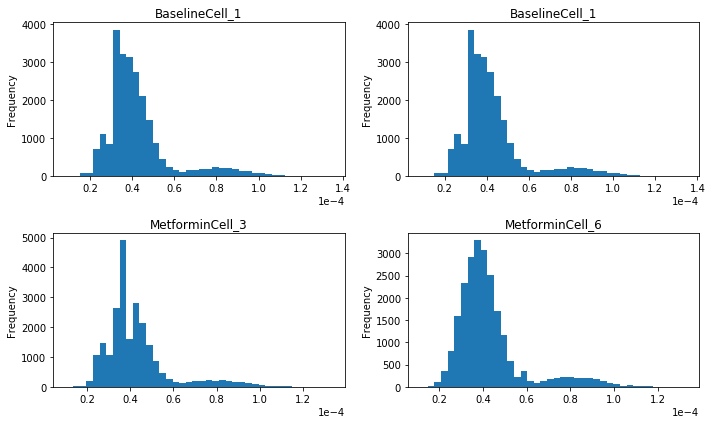

In [0]:
base_list = ['BaselineCell_1','BaselineCell_1']
met_list = ['MetforminCell_3','MetforminCell_6']
plt.figure(figsize=(10,6))
for i,cell in enumerate(base_list):
    plt.subplot(2,2,i+1)
    norm_df3[cell].plot.hist(bins=40)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.title(cell)
for i,cell in enumerate(met_list):
    plt.subplot(2,2,i+3)
    norm_df4[cell].plot.hist(bins=40)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.title(cell)
plt.tight_layout()

**OBSERVATION:** All of them seperately seem to fit a Gaussian distribution

# Task 2: Statistical Analysis

## Question 1. Kolmogorov–Smirnov (KS) Test

**(a).** Is KS test a parametric test or a non-parametric test? When does one want to use
non-parametric tests?

KS Test is a non-parametric test. Non-parametric tests are used when the underlying distribution is not known or the data does not satisfies the assumptions of parametric tests.
Non parametric tests are used in the following cases:
- When area of study is better represented by the median;
- Having a very small sample size;
- Having ordinal data, ranked data or outliers that can't be removed.  

**(b).** For each gene, find the p-value of a two-sample KS test on its expression across baseline cells vs. metformin-treated cells. In total you’re expected to find ~20,000 p-values. (Hint: Make use of the stats.ks_2samp API in the scipy package.)

In [0]:
from scipy import stats

p_values = []
for i in range(norm_df3.shape[0]):
    p_value = stats.ks_2samp(norm_df3.iloc[i, 4:], norm_df4.iloc[i, 4:])
    p_values.append(p_value[1])

p_values = pd.Series(p_values)

In [0]:
p_values.head()

0    0.888064
1    0.472197
2    0.133963
3    0.888064
4    0.732819
dtype: float64

**(c).** What is the null hypothesis of the KS test in our context? Take one gene as an example.

**Null Hypothesis:** The gene's expression is not altered  which means the difference observed in its expression level between baseline cells and metformin-treated cells is not statistically significant.

**(d).** Count the number of genes with significantly altered expression at alpha=0.1, 0.05, 0.01,
0.005 and 0.001 level? Summarize your answers in a table.

In [0]:
alphas = [0.1, 0.05, 0.01, 0.005, 0.001]
counts = []
for alpha in alphas:
    count = p_values[p_values.iloc[:] < alpha].count()
    counts.append(count)

In [0]:
count_table = pd.DataFrame(data = np.ones([5,2]), columns = [ 'alpha' , 'count'])
for i in range(len(counts)):
    count_table.iloc[i, 0] = alphas[i]
    count_table.iloc[i, 1] = counts[i]
count_table

,alpha,count
0,0.100,2301.0
1,0.050,1385.0
2,0.010,325.0
3,0.005,170.0
4,0.001,42.0


## Question 2. Multiple Testing

**(a)** P-value of 0.05 is generally considered a good threshold for significant discovery. What
does a p-value of 0.05 represent in our context?


 P_value in our context is the threshold of whether gene's expression is altered , which means the difference observed in its expression level between baseline cells and metformin-treated cells is statistically significant. When p_value is smaller than 0.05,  it means the null hypothesis should be rejected. Thus, the gene's expression is altered. When p_value is larger than 0.05, it means the null hypothesis should not be rejected. Thus, the gene's expression is not altered.

**(b)**  Based on the definition of p-value, if the null hypothesis is true, what distribution will the
p-values follow? (Hint: Google the definition of p-value.)


p-values follow a uniform distribution if null hypothesis is true

**(c)**  If no gene’s expression was altered, how many significant p-values does one expect to
see at alpha=0.1, 0.05, 0.01, 0.005 and 0.001 level? Compare your answers with your
results in Task 2.1.d. Show the comparison in a table.

In [0]:
Sig_pval= pd.DataFrame(data = np.ones([5,3]), columns = ['alpha', 'Expected Count' , 'Actual Count'])
total_vals = len(p_values)
for i in range(len(count_table)):
    Sig_pval['alpha'][i] = count_table['alpha'][i]
    Sig_pval['Expected Count'][i]= count_table['alpha'][i]*total_vals
    Sig_pval['Actual Count'][i] = count_table['count'][i]
Sig_pval

,alpha,Expected Count,Actual Count
0,0.100,2334.600,2301.0
1,0.050,1167.300,1385.0
2,0.010,233.460,325.0
3,0.005,116.730,170.0
4,0.001,23.346,42.0


**(d)**  Q-Q (quantile-quantile) plot is used to compare two probability distributions by plotting
their quantiles against each other. Say you’ve performed N KS tests in Task 2.1.b

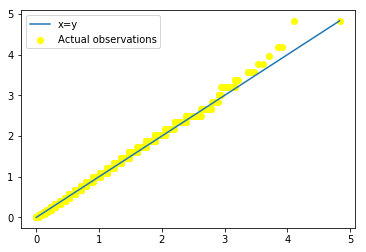

In [0]:
#Sample N-values from distribution
sample = np.random.uniform(low= 0, high=1, size = total_vals)

#Take log10 
pvals_log= -np.log10(p_values)
sample_log = -np.log10(sample)

#sort them in ascending order
pvals_log= sorted(pvals_log)
sample_log = sorted(sample_log)

plt.scatter(sample_log, pvals_log, label= 'Actual observations', c='Yellow')
plt.plot(np.linspace(start= 0 , stop= sample_log[-1], num=total_vals),np.linspace(start= 0 , stop= sample_log[-1], num=total_vals), label='x=y')
plt.legend()

plt.show()

**(e)** Answer the following questions

i. How does taking the -log10() of the p-values help you visualize the “tail” of the
p-value distribution?

After taking -log10(pvalues) the ones with the highest values of -log10(pvalues) are the ones in the "tail"of the p-value distribution and are more visible 

ii. What can you conclude from the Q-Q plot? (Hint: Think about what it means if the
Q-Q plot approximately aligns with the x=y line and what it implies about the null
hypothesis.)

The Q-Q plot approximately aligns with the x=y which means that the p-values are uniformly distributed implying that the null
hypothesis is true

# Task 3: Dimensionality Reduction and Clustering

In this task, you will apply clustering techniques to find out subpopulations of cells.
The results in Task 2.2.e. is related to the heterogeneity of cells. For example, the ~200
baseline cells might comprise multiple subpopulations and the response to metformin might
differ between or even within such subpopulations (after all, cell responses are stochastic
processes.) Which is to say, metformin might have only induced alterations in the expression
levels of crucial genes in a subpopulation of cells instead of all cells. Thus, it is essential to
first identify such subpopulations before running statistical tests.
Identifying subpopulations based on cells’ gene expression profiles is essentially an
unsupervised clustering problem. That is to identify clusters of cells based on the similarities of
their gene expression profiles. This is a difficult problem because: 1) The number of clusters is
not known a priori, 2) There is usually high level of noise in the data (both technical and
biological), and 3) The number of dimensions (i.e. genes) is large.
When working with high-dimensional datasets such as gene expression matrices, it can often be
beneficial to apply some sort of dimensionality reduction method. Projecting the data onto a
lower-dimensional subspace could substantially reduce the amount of noise. An additional
benefit is that it is typically much easier to visualize the data in a 2 or 3-dimensional subspace.
Therefore, we will be performing Principal Component Analysis to reduce the dimensionalities of
the gene expression matrices.

## Question 1. Principal Component Analysis (PCA)

The easiest way to visualize the data is by transforming it using PCA and then visualizing the
first two principal components. Note: PCA, plotting, and calculation should be done separately
for baseline cells and metformin-treated cells.

**(a)** Treating cells as samples and genes as features (dimensions), perform PCA on the
gene expression data. (Hint: make use of the decomposition.PCA API in the sklearn
package. Select “full” for svd_solver .)

In [0]:
cells_base = norm_df3.iloc[:,4:].values.T
cells_met  = norm_df4.iloc[:,4:].values.T

In [0]:
from sklearn.decomposition import PCA
pca_base = PCA(n_components = 60,svd_solver='full')
cells_pca_base = pca_base.fit_transform(cells_base)
pca_met = PCA(n_components = 60,svd_solver='full')
cells_pca_met = pca_met.fit_transform(cells_met)

**(b)** Order the principal components by decreasing contribution to total variance. Plot a scree
plot to show the fraction of total variance in the data as explained by each principal
component. How many principal components are needed in order to explain 30% of the
total variance?

In [0]:
var_base = pca_base.explained_variance_ratio_
var_met  = pca_met.explained_variance_ratio_
cumvar_base = np.cumsum(var_base)
cumvar_met  = np.cumsum(var_met)

Text(0, 0.5, 'Fraction of Total Variance')

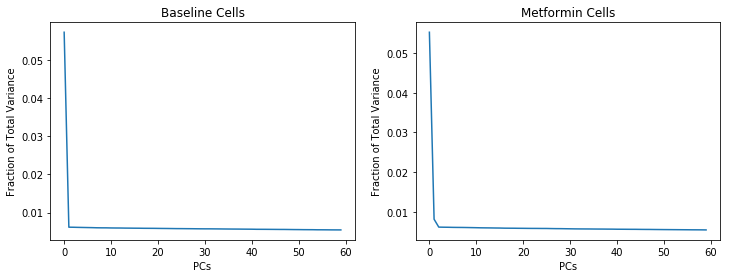

In [0]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(var_base)
plt.title('Baseline Cells')
plt.xlabel('PCs')
plt.ylabel('Fraction of Total Variance')
plt.subplot(1,2,2)
plt.plot(var_met)
plt.title('Metformin Cells')
plt.xlabel('PCs')
plt.ylabel('Fraction of Total Variance')

Text(0, 0.5, 'Cummulative Fraction of Variance')

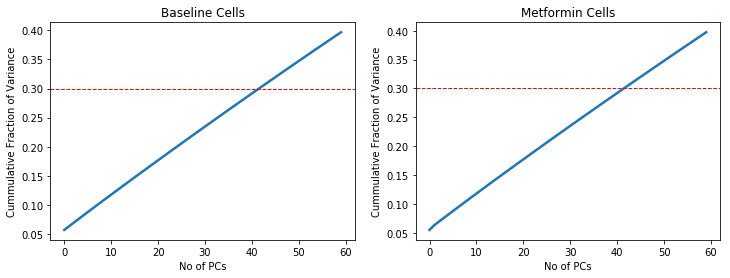

In [0]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(cumvar_base,linewidth=2.5)
plt.axhline(y=0.3,color='r',linewidth=1,linestyle='--')
plt.title('Baseline Cells')
plt.xlabel('No of PCs')
plt.ylabel('Cummulative Fraction of Variance')
plt.subplot(1,2,2)
plt.plot(cumvar_met,linewidth=2.5)
plt.axhline(y=0.3,color='r',linewidth=1,linestyle='--')
plt.title('Metformin Cells')
plt.xlabel('No of PCs')
plt.ylabel('Cummulative Fraction of Variance')

In [0]:
No_PC_base = sum(cumvar_base <= 0.3)
No_PC_met  = sum(cumvar_met <= 0.3)
print('No of PCs needed to explain 30% of total variance for Baseline Cells:  ',No_PC_base)
print('No of PCs needed to explain 30% of total variance for Metformin Cells: ',No_PC_met)

No of PCs needed to explain 30% of total variance for Baseline Cells:   42
No of PCs needed to explain 30% of total variance for Metformin Cells:  42


**(c)** Plot a scatter plot of the gene expression with the first two components. Briefly
summarize your observations.

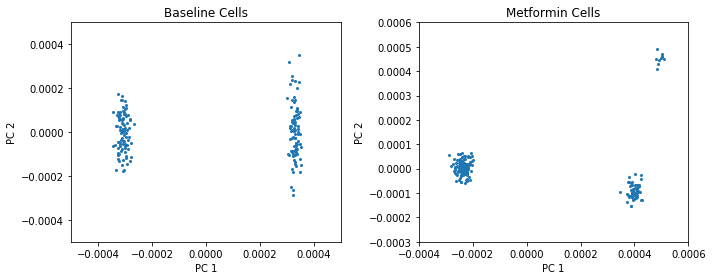

In [0]:
plt.figure(figsize=(10,4))
# Baseline Cells plot
plt.subplot(1,2,1)
plt.scatter(cells_pca_base[:, 0], cells_pca_base[:, 1],s=4)
plt.xlim([-5e-4, 5e-4])
plt.ylim([-5e-4, 5e-4])
plt.title('Baseline Cells')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# Metformin Cells plot
plt.subplot(1,2,2)
plt.scatter(cells_pca_met[:, 0], cells_pca_met[:, 1],s=4)
plt.xlim([-4e-4, 6e-4])
plt.ylim([-3e-4, 6e-4])
plt.title('Metformin Cells')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()

**Observations**: We can see baseline cells clearly have two clusters and then after metformin treatment, one cluster is more closely packed about the mean and is shifted a bit towards right and the other one splits into two clusters one with with lower PC-2 coordinate and larger PC-1 of mean and the other with larger PC-2 coordinate and larger PC-1 of mean

## Question 2. t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is a popular dimensionality reduction technique for visualization. t-SNE models each
high-dimensional object by a two- or three-dimensional point such that similar projects are
modeled by nearby points and dissimilar objects are modeled by distant points with high
probability. We are not expecting you to know t-SNE in detail, but it is useful to know how to run
t-SNE with a package and interpret the results.

**(a)** Treating cells as samples and genes as features (dimensions), perform t-SNE to
visualize the gene expression data in 2D. (Hint: make use of the manifold.TSNE API in
the scikit-learn package) t-SNE and plotting should be done for baseline cells and
metformin-treated cells separately. Briefly summarize your observations.

In [0]:
from sklearn.manifold import TSNE

tsne_base = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
cells_tsne_base = tsne_base.fit_transform(cells_base)
tsne_met = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
cells_tsne_met = tsne_met.fit_transform(cells_met)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 184 samples in 0.002s...
[t-SNE] Computed neighbors for 184 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 184 / 184
[t-SNE] Mean sigma: 0.000179
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.335842
[t-SNE] KL divergence after 300 iterations: 0.412344
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 184 samples in 0.002s...
[t-SNE] Computed neighbors for 184 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 184 / 184
[t-SNE] Mean sigma: 0.000182
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.241325
[t-SNE] KL divergence after 300 iterations: 0.633288


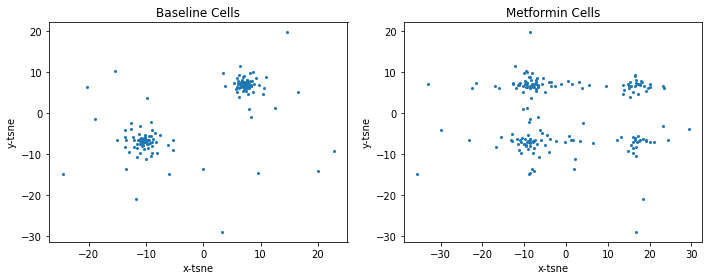

In [0]:
plt.figure(figsize=(10,4))
# Baseline Cells plot
plt.subplot(1,2,1)
plt.scatter(cells_tsne_base[:, 0], cells_tsne_base[:, 1],s=4)
plt.title('Baseline Cells')
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
# Metformin Cells plot
plt.subplot(1,2,2)
plt.scatter(cells_tsne_met[:, 0], cells_tsne_base[:, 1],s=4)
plt.title('Metformin Cells')
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.tight_layout()

**(b)** Compare the results of PCA and t-SNE.

**Conclusion:** Using PCA we get “well defined” clusters whereas using tsne results results in scattered observations which may not be good clusters

## Question 3. Clustering

We now performing clustering to identify the subpopulations of cells. For the purpose of this
project, clustering should be performed after projecting the data into 2D using PCA (Task
3.1.a.). Note : In reality, various factors go into determining the number of dimensions to retain
after PCA.
  
Baseline cells and metformin-treated cells should be clustered separately. Visualize your
results by plotting a 2D scatter plot just like you did in Task 3.1.c., but with each point colored by
the clusters they belong to (use different colors for different clusters). For all clustering
algorithms below, you will need to decide the optimal number of clusters by yourself and reason
about it. Provide numbers, tables and/or graphs to support your reasoning.

#### **(a)** K-Means Clustering

In [0]:
from sklearn.cluster import KMeans

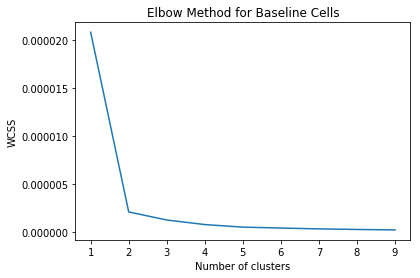

In [0]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cells_pca_base[:, 0:2])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method for Baseline Cells')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
# Optimal No of Clusters for Baseline Cells = 2

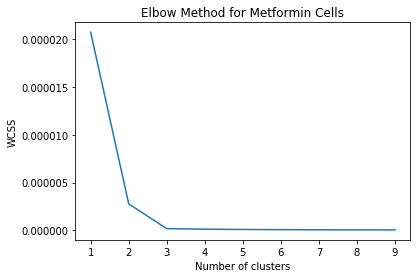

In [0]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cells_pca_met[:, 0:2])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method for Metformin Cells')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
# Optimal No of Clusters for Metformin Cells = 3

In [0]:
kmeans_base = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_base_labels = kmeans_base.fit_predict(cells_pca_base[:, 0:2])
kmeans_met = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_met_labels  = kmeans_met.fit_predict(cells_pca_met[:, 0:2])

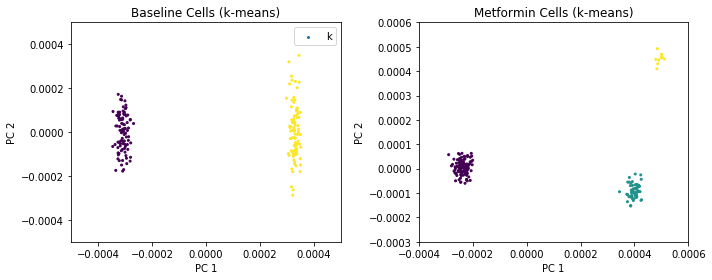

In [0]:
plt.figure(figsize=(10,4))
# Baseline Cells plot
plt.subplot(1,2,1)
plt.scatter(cells_pca_base[:, 0], cells_pca_base[:, 1],s=4, c=kmeans_base_labels)
plt.xlim([-5e-4, 5e-4])
plt.ylim([-5e-4, 5e-4])
plt.title('Baseline Cells (k-means)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend('kmeans')
# Baseline Cells plot
plt.subplot(1,2,2)
plt.scatter(cells_pca_met[:, 0], cells_pca_met[:, 1],s=4, c=kmeans_met_labels)
plt.xlim([-4e-4, 6e-4])
plt.ylim([-3e-4, 6e-4])
plt.title('Metformin Cells (k-means)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()

#### (b) Gaussian Mixture Model Clustering 

In [0]:
from sklearn.mixture import GaussianMixture

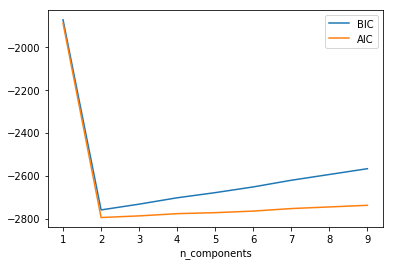

In [0]:
# Reference: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(100*cells_pca_base[:, 0:2])
          for n in n_components]

plt.plot(n_components, [m.bic(100*cells_pca_base[:, 0:2]) for m in models], label='BIC')
plt.plot(n_components, [m.aic(100*cells_pca_base[:, 0:2]) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

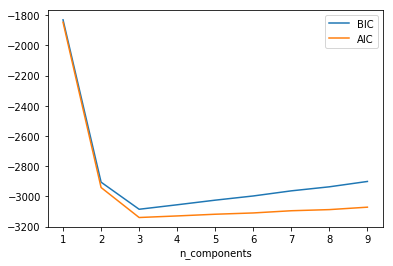

In [0]:
# Reference: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(100*cells_pca_met[:, 0:2])
          for n in n_components]

plt.plot(n_components, [m.bic(100*cells_pca_met[:, 0:2]) for m in models], label='BIC')
plt.plot(n_components, [m.aic(100*cells_pca_met[:, 0:2]) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [0]:
gmm_base = GaussianMixture(n_components=2)
gmm_base_labels = gmm_base.fit_predict(100*cells_pca_base[:, 0:2])
gmm_met = GaussianMixture(n_components=3)
gmm_met_labels = gmm_met.fit_predict(100*cells_pca_met[:, 0:2])

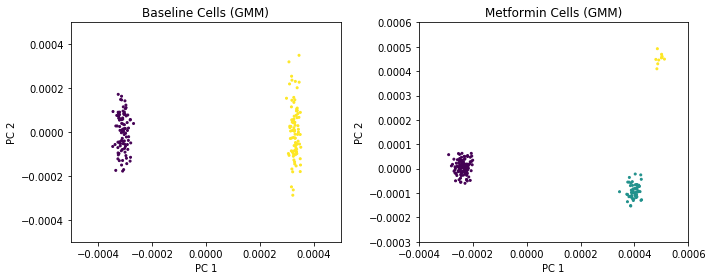

In [0]:
plt.figure(figsize=(10,4))
# Baseline Cells plot
plt.subplot(1,2,1)
plt.scatter(cells_pca_base[:, 0], cells_pca_base[:, 1],s=4, c=gmm_base_labels)
plt.xlim([-5e-4, 5e-4])
plt.ylim([-5e-4, 5e-4])
plt.title('Baseline Cells (GMM)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# Baseline Cells plot
plt.subplot(1,2,2)
plt.scatter(cells_pca_met[:, 0], cells_pca_met[:, 1],s=4, c=gmm_met_labels)
plt.xlim([-4e-4, 6e-4])
plt.ylim([-3e-4, 6e-4])
plt.title('Metformin Cells (GMM)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()

#### (C) Single Linkage Hierarchical Clustering

In [0]:
from sklearn.cluster import AgglomerativeClustering

Reference: http://www.awesomestats.in/python-cluster-validation/

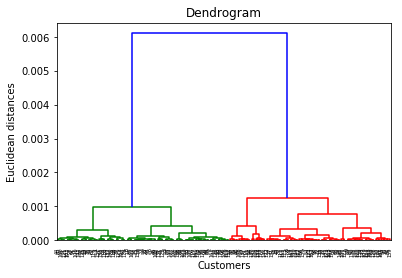

In [0]:
# plotting a dendogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(cells_pca_base[:, 0:2], method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [0]:
hc_base = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
hc_base_labels= hc_base.fit_predict(cells_pca_base[:, 0:2])
hc_met = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hc_met_labels = hc_met.fit_predict(cells_pca_met[:, 0:2])

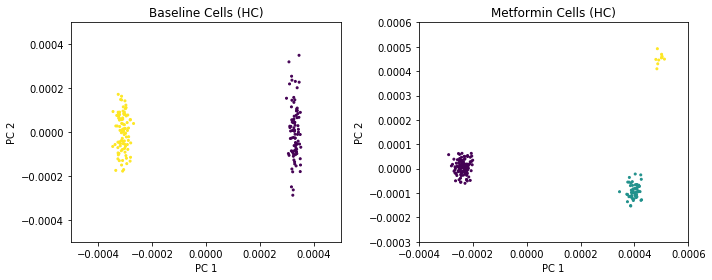

In [0]:
plt.figure(figsize=(10,4))
# Baseline Cells plot
plt.subplot(1,2,1)
plt.scatter(cells_pca_base[:, 0], cells_pca_base[:, 1], s=4, c=hc_base_labels)
plt.xlim([-5e-4, 5e-4])
plt.ylim([-5e-4, 5e-4])
plt.title('Baseline Cells (HC)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# Baseline Cells plot
plt.subplot(1,2,2)
plt.scatter(cells_pca_met[:, 0], cells_pca_met[:, 1],s=4, c=hc_met_labels)
plt.xlim([-4e-4, 6e-4])
plt.ylim([-3e-4, 6e-4])
plt.title('Metformin Cells (HC)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()

**(D)** Compare your results for different clustering methods and interpret them. Pick the results
from your favorite one for the following analyses.

**Comparsion:** The results from three algorithms are similar. We will go with gmm clustering results.

# Task 4: Interpret Results

In this task, you are going to identify the set of genes with significantly altered expression and
their associated pathways.

## Question 1. Identify altered genes

For each subpopulation (cluster) M i in the metformin-treated cells, there are two possibilities:


1) The cells in M i are not affected by metformin. Thus, they have the same gene expression
profile as one of the subpopulations in the baseline cells. Consequently, M i will be identical to
one of the baseline subpopulations, while being distinctively different from the other
subpopulations.


2) For cells in M i , the expression levels of ~50-400 genes were altered by metformin. Thus, they
have similar gene expression profiles as one of the subpopulations in the baseline cells, but not
entirely the same. Consequently, M i will be more similar to one of the baseline subpopulations
compared to the other subpopulations, but not identical to any of them.

Based on the above information, answer the following questions:

**(a)** For each metformin-treated subpopulations, determine whether or not it is affected by
metformin. Show and explain your decision process in detail. Provide numbers, tables
and/or graphs where necessary.

In [0]:
kmeans_base_labels = pd.DataFrame(kmeans_base_labels)
kmeans_met_labels = pd.DataFrame(kmeans_met_labels)

labels_base_num = kmeans_base_labels[0].value_counts()
labels_met_num = kmeans_met_labels[0].value_counts()

In [0]:
gmm_base.means_

array([[-3.08762436e-02, -1.62662669e-05],
       [ 3.29577881e-02,  1.73628692e-05]])

In [0]:
gmm_met.means_

array([[-0.02361995,  0.00059334],
       [ 0.03981102, -0.00914402],
       [ 0.04943064,  0.04517877]])

In [0]:
is_identical = []
for i in range(len(gmm_met.means_)):
    flag = -1
    for j in range(len(gmm_base.means_)):
        if np.array_equal(gmm_met.means_[i], gmm_base.means_[j]):
            flag = j
            break
    if flag == -1:
        is_identical.append(-1)
    else:
        is_identical.append(flag)

is_identical

[-1, -1, -1]

As showed above, all result is -1, which means all Mi are not identical to one of the baseline subpopulations and hence it indicates that both


**(b)** For each affected subpopulations M i , identify the baseline subpopulation that M i is most
similar to. Show and explain your decision process in detail. Provide numbers, tables
and/or graphs where necessary.

In [0]:
gmm_met.means_

array([[-0.02361995,  0.00059334],
       [ 0.03981102, -0.00914402],
       [ 0.04943064,  0.04517877]])

In [0]:
gmm_base.means_

array([[-3.08762436e-02, -1.62662669e-05],
       [ 3.29577881e-02,  1.73628692e-05]])

In [0]:
import sys
from scipy.spatial import distance

projection = []
for i in range(len(gmm_met.means_)):
    min_idx = -1
    min_dist = sys.maxsize
    for j in range(len(gmm_base.means_)):
        temp_dist = distance.euclidean(gmm_met.means_[i], gmm_base.means_[j])
        if temp_dist < min_dist:
            min_idx = j
            min_dist = temp_dist
    projection.append(min_idx)
    
for i in range(len(projection)):
    print("M" + str(i) + " is most similar to baseline subpopulation cluster "+ str(projection[i]))

M0 is most similar to baseline subpopulation cluster 0
M1 is most similar to baseline subpopulation cluster 1
M2 is most similar to baseline subpopulation cluster 1


**(c)** Identify genes with significantly altered expression by comparing each affected
subpopulation with its corresponding baseline subpopulation. Use KS test with alpha
level=0.0000025. This alpha level was chosen to account for multiple testing caveats
implied in Task 2.

In [0]:
Genes = norm_df3.T.columns
labeled_base = norm_df3.iloc[:,4:].T
labeled_base['cluster'] = kmeans_base_labels.values
labeled_met = norm_df4.iloc[:,4:].T
labeled_met['cluster'] = kmeans_met_labels.values

In [0]:
base_cluster0 = labeled_base[labeled_base['cluster'] == 0]
base_cluster1 = labeled_base[labeled_base['cluster'] == 1]
Met_cluster0 = labeled_met[labeled_met['cluster'] == 0]
Met_cluster1 = labeled_met[labeled_met['cluster'] == 1]
Met_cluster2 = labeled_met[labeled_met['cluster'] == 2]

In [0]:
altered_genes =[]
alpha = 0.0000025
for gene in Genes:
    #check for base_cluster0 and met_cluster0
    pvals = stats.ks_2samp(base_cluster0[gene].values,Met_cluster0[gene].values)
    if pvals[1] < alpha:
        altered_genes.append(gene)
    
    #check for base_cluster1 and met_cluster1
    pval = stats.ks_2samp(base_cluster1[gene].values,Met_cluster1[gene].values)
    if pval[1] < alpha:
        altered_genes.append(gene)
        
    #check for base_cluster1 and met_cluster2
    pv = stats.ks_2samp(base_cluster1[gene].values,Met_cluster2[gene].values)
    if pv[1] < alpha:
        altered_genes.append(gene)

In [0]:
altered_genes

['TRNP1',
 'OMA1',
 'LRRC8D',
 'LOC653513',
 'LOC339529',
 'OR2AK2',
 'PHYH',
 'LOC100507605',
 'SPOCK2',
 'LOC728190',
 'TCTN3',
 'PIK3AP1',
 'MIR608',
 'MIR4295',
 'HPS5',
 'LINC00301',
 'B3GNT1',
 'SRSF8',
 'C11orf92',
 'CDKN1B',
 'DHH',
 'RDH16',
 'CCDC59',
 'RMST',
 'SDS',
 'LOC116437',
 'RNF6',
 'GUCY1B2',
 'SLC15A1',
 'MRPL52',
 'MIR409',
 'LOC283663',
 'MYO1E',
 'SNORD18A',
 'IDH3A',
 'PGP',
 'VASN',
 'CEP112',
 'SNORA37',
 'ZNF57',
 'NRTN',
 'TRAPPC5',
 'LOC284395',
 'CYP2A6',
 'ERCC2',
 'C19orf63',
 'NAB1',
 'PRKAG3',
 'SSTR4',
 'HNF4A',
 'LINC00310',
 'DSCAM-AS1',
 'MIR3928',
 'BTD',
 'TCTA',
 'GNAI2',
 'NPHP3',
 'GBA3',
 'RANBP9',
 'IL17F',
 'TMEM244',
 'OSTCP1',
 'SKAP2',
 'AUTS2',
 'KCND2',
 'FAM71F1',
 'CREB3L2',
 'SORBS3',
 'CCDC25',
 'SGK196',
 'MYC',
 'LINC00051',
 'GML',
 'MELK',
 'LOC100507244',
 'FAM47A',
 'PABPC1L2A']

## Question 2. Gene Set Characterization

Pathway analysis is one technique which is a helpful tool to characterize sets of genes. To give
you a flavor of how biological discoveries can be made from your analysis above, you will
perform a “baby” version of pathway analysis with synthesized data instead of going through the
actual software used for such analysis. Characterize the composition of your identified gene set
by answering the following question:

**(a)** What are the most common pathways these genes are associated with? Make use of
PathwayDictionary.txt .

In [0]:
with open('./PathwayDictionary.txt') as f:
    lines = f.readlines()
    
pathways_name = []
pathways_gene = []
pathways_time = []
for line in lines:
    pathways_name.append(line.split(':')[0])
    pathways_gene.append(line.split(':')[1].split(","))
    pathways_time.append(str(0))

pathways = pd.DataFrame(data = {"way":pathways_name, "gene":pathways_gene, "times":pathways_time})

for i in range(pathways.shape[0]):
    times = 0
    for gene in pathways.iloc[i]['gene']:
        if gene in altered_genes:
            times += 1
    pathways.iloc[i]['times'] = times

pathways.sort_values("times", ascending=False)

,way,gene,times
175,Wnt signaling pathway,"[AADACL4, ADAD1, ADAM17, ADCY4, ADH1B, ADRA2B,...",31
115,Notch signaling pathway,"[AAMP, ABI2, ABRA, ACBD3, ACTR1A, ADCYAP1, AFG...",20
140,Proline biosynthesis,"[ABCA9, ABCB9, ABHD2, ACVR1, ADRA1B, AFAP1L2, ...",3
32,Beta1 adrenergic receptor signaling pathway,"[AAAS, AASDH, ACTR3BP2, ACYP1, AIM1L, AKIP1, A...",2
11,Alanine biosynthesis,"[ABCA10, ABCC3, ACD, ACLY, ACO2, ADAM15, ADAM3...",2
80,Heterotrimeric G-protein signaling pathway-Gq ...,"[ACOT13, ADH1B, APOB, ARFGEF2, ASPHD2, ATP6V1G...",2
114,Nicotinic acetylcholine receptor signaling pat...,"[ACD, ACTN2, AKR1C2, ALKBH4, AMY2A, ARHGAP36, ...",2
87,Hypoxia response via HIF activation,"[A2MP1, AA06, ABCA3, ABCD3, ABCG8, ACOT4, ACPT...",2
97,Leucine biosynthesis,"[AANAT, ABCD4, ABHD6, ACCN2, ACHE, ACOT7, ACOT...",1
174,Vitamin D metabolism and pathway,"[ABCA7, ABCA9, ABCB4, ABCC11, ACBD3, ACYP1, AD...",1


Every pathway appears once. Thus, there is no most common pathway.

**(b)** Are there any novel genes in your identified gene set ,i.e., genes that have not been
implied in any pathways contained in PathwayDictionary.txt ?

In [0]:
import itertools

with open('./PathwayDictionary.txt') as f:
    lines = f.readlines()

genes = []
for line in lines:
    genes.append(line.split(':')[1].split(','))

genes = list(itertools.chain.from_iterable(genes))
genes_pathway_set = set(genes)

novel_genes = []
for gene in altered_genes:
    if gene not in genes_pathway_set:
        novel_genes.append(gene)

novel_genes

['LOC339529',
 'C11orf92',
 'SDS',
 'GUCY1B2',
 'VASN',
 'CEP112',
 'CYP2A6',
 'PRKAG3',
 'NPHP3',
 'GBA3',
 'SKAP2',
 'KCND2',
 'CREB3L2',
 'LOC100507244',
 'FAM47A']